In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
np.shape(X)

(150, 4)

In [70]:
def kmeans (X, k):
  n, d = np.shape(X)
  l = np.min(X , axis=0)
  h = np.max(X,  axis=0)
  centroids = np.random.uniform(l, h , size = (k, d))
  centroids_copy = np.copy(centroids)
  clusters = np.zeros(n)
  b = 0
  niter = 0
  while b == 0: 
    for j in range(n):
      dist = np.zeros(k)
      for i in range(k):
        dist[i] = np.linalg.norm(X[j, :] - centroids[i, :])
      clusters[j] = np.argmin(dist, axis =0)
    for i in range(k):
      if i in clusters :
        centroids[i, :] = np.mean(X[clusters == i ,:], axis = 0)
      else :
        centroids[i, :] = np.random.uniform(l, h , size = (1,d))
    if (centroids_copy == centroids).all():
      b = 1
    else:
      centroids_copy = np.copy(centroids)
  return centroids, clusters


In [60]:
def cost(X, k):
  centroids, clusters = kmeans (X, k)
  n, d = np.shape(X)
  S = 0
  for i in range(n):
    S += np.linalg.norm(X[i, :] - centroids[int(clusters[i]), :])
  return S

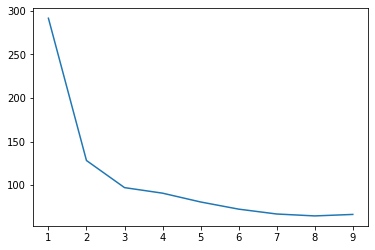

In [72]:
l = []
for k in range (1, 10):
  l.append(cost(X, k))
plt.plot(np.arange(1, 10), l)

In [73]:
k = 3
centroids, clusters = kmeans (X, k)
error = abs(sum(clusters-y)/sum(y))
print('The relative error is:', error)

The relative error is: 0.08
